<a href="https://colab.research.google.com/github/nadern87/BassDataOsmnx/blob/main/Feature_selection_Techniques_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv("Bass_BigTable.csv")
data 

,Price,Id,Size,Format,City,Impression,B01001001,B01001002,B01001003,B01001004,...,serviceRoad,trackRoad,footwayRoad,pathRoad,traffic_signals,aggr_residential_zone,aggr_commercial_zone,aggr_natural_zone,BFP_Count,BFP_Area
0,700,1,44.6,Individual,Lacassine LA,68992,5384,2919,213,152,...,43,5,4,0,0,2,1,29,22,694.83
1,700,2,44.6,Individual,Lacassine LA,68992,5384,2919,213,152,...,52,3,17,0,0,3,1,30,12,486.00
2,700,3,44.6,Stacked,Lacassine LA,68992,4641,2198,174,162,...,183,10,1,0,0,1,0,42,38,919.75
3,700,4,44.6,Individual,Baldwin LA,24379,1534,876,6,0,...,66,2,0,0,0,0,0,21,125,1430.83
4,825,6,44.6,Individual,Lacassine LA,68992,5384,2919,213,152,...,43,5,4,0,0,2,1,29,22,694.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,700,85,44.6,Individual,Broussard LA,47152,4155,2139,130,281,...,196,4,29,0,1,10,1,33,23,4313.40
69,700,86,44.6,Individual,Broussard LA,44507,3447,1778,108,43,...,175,2,18,0,0,4,0,16,131,3833.17
70,700,87,44.6,Individual,Broussard LA,44507,3420,1759,120,48,...,175,2,18,0,0,4,0,16,115,3833.17
71,700,89,44.6,Individual,New Iberia LA,32202,3823,1878,93,313,...,599,3,196,18,0,18,30,36,34,5431.19


In [19]:
def convert_categorical_to_numeric(df):
    for col in df.columns:
        if df[col].dtype.name == 'object':
            df[col] = pd.Categorical(df[col]).codes
    return df

In [20]:
df = convert_categorical_to_numeric(data)
print(df)

    Price  Id  Size  Format  City  Impression  B01001001  B01001002  \
0     700   1  44.6       0    12       68992       5384       2919   
1     700   2  44.6       0    12       68992       5384       2919   
2     700   3  44.6       1    12       68992       4641       2198   
3     700   4  44.6       0     1       24379       1534        876   
4     825   6  44.6       0    12       68992       5384       2919   
..    ...  ..   ...     ...   ...         ...        ...        ...   
68    700  85  44.6       0     3       47152       4155       2139   
69    700  86  44.6       0     3       44507       3447       1778   
70    700  87  44.6       0     3       44507       3420       1759   
71    700  89  44.6       0    15       32202       3823       1878   
72    700  90  44.6       0    15       44507       5384       2919   

    B01001003  B01001004  ...  serviceRoad  trackRoad  footwayRoad  pathRoad  \
0         213        152  ...           43          5            4 

In [21]:
y = df['Price']
 #Load X Variables into a Pandas Dataframe with columns 
X = df.drop(['Price'], axis = 1)
 #y is dependent variable and X is independent variable.

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=100,test_size=0.3) 

Finding the correlated features


In [25]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: colname = corr_matrix.columns[i]                  
    col_corr.add(colname)
    return col_corr 

With the help of this function, we can select highly correlated features. The purpose is to select the correlated features and then remove them. If you note then we have written abs means absolute, because we will get a negative correlation also which will convert into a positive.

Now the very important question arises here Can we do the same for test data also. The answer is NO. Why? In order to avoid overfitting. Here we have to set the threshold value for correlation also.

##Getting correlated features


In [26]:
corr_features = correlation(X_train, 0.7)

In [10]:
corr_features

{'aggr_commercial_zone'}

Like here we set threshold=0.7 which means the features which are 70% or more correlated will be returned in the output. You can set any value of the threshold. Most people set it to be 0.85.

##Removing correlated features


In [27]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)
X_train 

,Id,Size,Format,City,Impression,B01001001,B01001002,B01001003,B01001004,B01001005,...,serviceRoad,trackRoad,footwayRoad,pathRoad,traffic_signals,aggr_residential_zone,aggr_commercial_zone,aggr_natural_zone,BFP_Count,BFP_Area
21,25,44.6,0,15,36502,4218,2157,58,291,6,...,708,5,197,18,0,17,22,22,36,2146.53
45,55,44.6,1,18,109883,3612,1909,119,77,152,...,380,3,60,1,10,19,1,14,59,2327.29
0,1,44.6,0,12,68992,5384,2919,213,152,169,...,43,5,4,0,0,2,1,29,22,694.83
18,21,44.6,0,17,49098,1732,864,119,75,65,...,34,0,0,0,0,0,0,6,16,413.88
12,15,44.6,0,15,44507,3530,1556,43,274,291,...,510,2,168,12,0,14,23,30,11,3092.07
6,8,44.6,0,15,50629,3947,2079,136,296,114,...,688,6,205,18,0,17,28,28,179,1904.76
47,57,44.6,1,19,44507,3364,1719,146,59,108,...,150,5,23,0,0,6,0,6,72,2159.70
38,46,44.6,1,6,79096,5438,2757,190,184,154,...,70,0,0,0,1,7,0,1,41,1260.88
60,72,44.6,1,1,24379,1606,934,9,2,41,...,75,2,0,0,0,0,0,21,150,1430.83
37,44,44.6,0,14,31934,2529,1146,38,86,30,...,79,14,1,0,0,4,0,8,38,1109.66


##Chi-square
###Perform chi2 test

In [29]:
from sklearn.feature_selection import chi2
#Calculating Fscore and p value
f_p_values=chi2(X_train,y_train)
f_p_values

(array([1.35511902e+02, 1.13211395e+02, 7.86538462e+00, 2.43114754e+01,
        1.10570381e+05, 4.16366667e+03, 2.26548577e+03, 6.02591376e+02,
        5.65869560e+02, 5.88916356e+02, 2.07328822e+02, 2.46295667e+02,
        2.69356941e+02, 1.09038989e+03, 1.01582057e+03, 2.61398038e+02,
        2.55647081e+02, 7.36937202e+02, 3.31872616e+02, 3.40637721e+02,
        1.67582778e+02, 3.58497795e+02, 1.50235612e+02, 4.74435860e+02,
        1.19010807e+02, 1.85450762e+02, 4.40812539e+02, 2.33704180e+02,
        9.46326733e+01, 2.84829386e+02, 2.05178996e+03, 3.29004520e+02,
        2.40447169e+02, 9.10738546e+02, 7.05183506e+02, 5.67140817e+02,
        2.49802522e+02, 3.60258138e+02, 2.72777452e+02, 3.75524794e+02,
        8.59521957e+02, 4.52957529e+02, 2.71290750e+02, 2.27350324e+02,
        1.98186291e+02, 1.92625044e+02, 9.52346568e+01, 2.36005796e+02,
        1.14405622e+02, 3.47732863e+02, 3.84204616e+02, 6.48400626e+02,
        3.25985821e+02, 2.13934251e+02, 1.70016750e+01, 1.281997

Chi-square is used to find F-score and p-values for all features. So in this case the first array is for F score and the second array is for p- values. Now, what is the importance of these two values? And the more the value of the F score the more important the feature is and the lesser the value of the p-value the more important will be the feature.

###Representing in list form


In [32]:
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns

Sorting values in ascending order


In [35]:
p_values.sort_index(ascending=False)

unclassifiedRoad      4.352507e-31
traffic_signals       9.166300e-36
trackRoad             3.182469e-32
tertiary_linkRoad     5.854718e-01
tertiaryRoad          2.751728e-26
                         ...      
B01001004            5.064155e-117
B01001003            6.487900e-125
B01001002             0.000000e+00
B01001001             0.000000e+00
Aggr_lanes            2.303802e-08
Length: 407, dtype: float64

Now let’s learn the third very important technique i.e feature selection by using mutual information gain.

##Mutual information gain
###Importing mutual information gain


In [36]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([1.01300711e-01, 1.36335315e-01, 1.21187991e-01, 2.98414126e-01,
       1.62803765e-01, 9.16151060e-02, 0.00000000e+00, 5.87792232e-02,
       8.15403700e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.17390750e-02, 0.00000000e+00, 1.60195015e-01, 0.00000000e+00,
       4.18423576e-02, 2.32843167e-01, 5.49220487e-02, 7.59857541e-03,
       5.37905125e-02, 0.00000000e+00, 0.00000000e+00, 1.69343535e-01,
       0.00000000e+00, 0.00000000e+00, 1.38524969e-01, 0.00000000e+00,
       1.30570140e-01, 1.49500450e-01, 0.00000000e+00, 0.00000000e+00,
       7.75745649e-02, 0.00000000e+00, 0.00000000e+00, 4.48278830e-03,
       1.70782537e-02, 0.00000000e+00, 4.77425468e-02, 4.91207854e-02,
       1.56627153e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.96899520e-02, 1.89826564e-01, 0.00000000e+00,
       0.00000000e+00, 9.29082125e-02, 5.97400590e-02, 0.00000000e+00,
       8.62187358e-02, 8.29586167e-02, 3.44516440e-02, 0.00000000e+00,
      

mutual_info_classif is a library that is present in feature_selection. It is the property of mutual information gain that the value you will get will never be negative. The higher the value the more important that feature will be or you can say that the dependency of that independent feature will be more on the dependent feature.

###Representing in list form


In [37]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

B15002021           0.327203
City                0.298414
B15002017           0.272102
B14003050           0.267791
primary_linkRoad    0.248930
                      ...   
B14004018           0.000000
B01001033           0.000000
B14004020           0.000000
B14004022           0.000000
B14003057           0.000000
Length: 407, dtype: float64

###Plotting the graph
plot the ordered mutual_info values per feature



<Axes: >

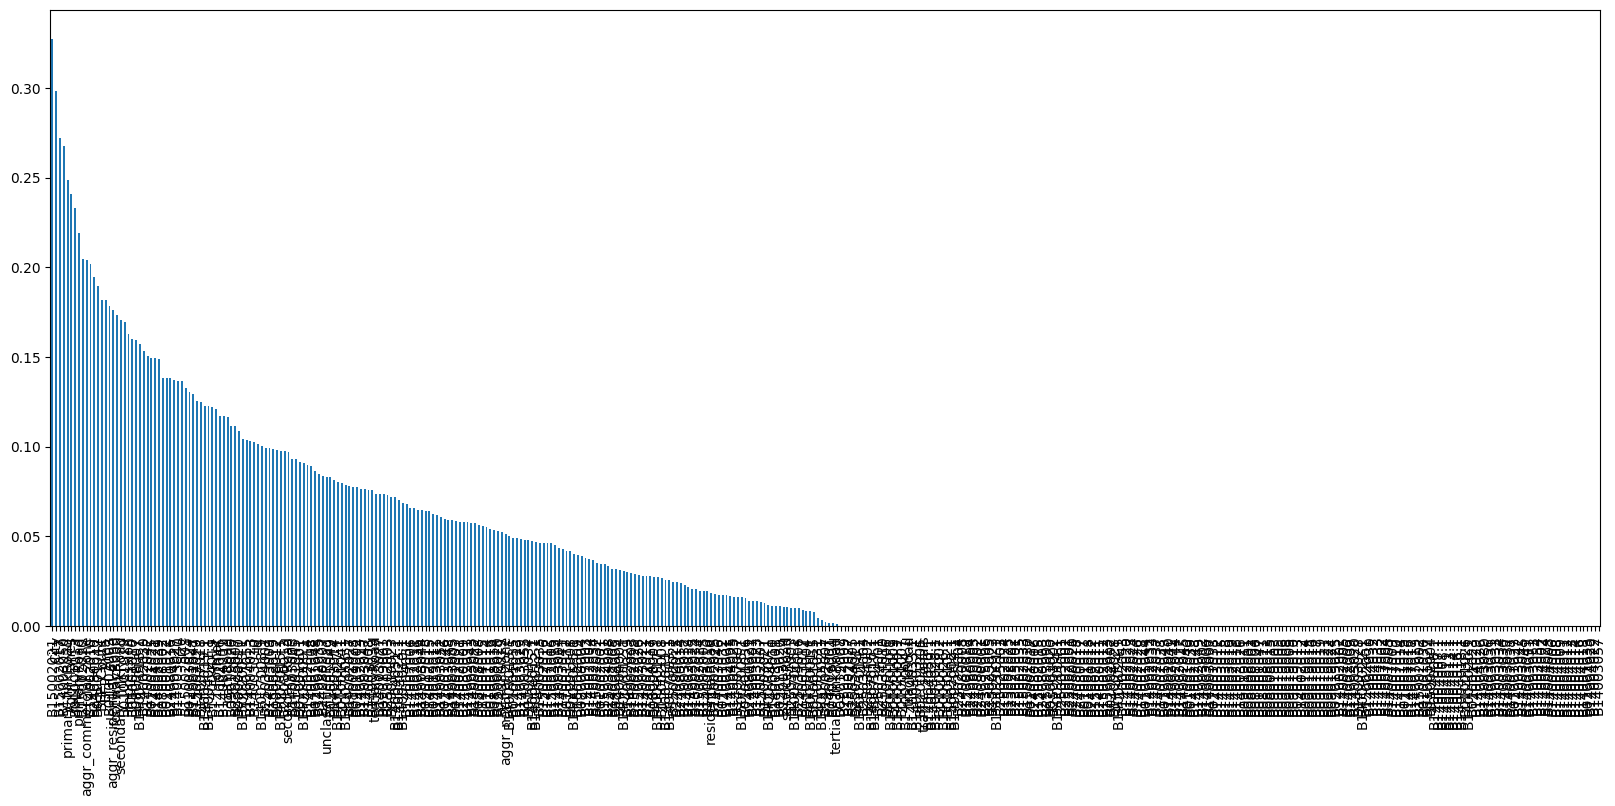

In [39]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

###Selecting best 5 features


In [40]:
from sklearn.feature_selection import SelectKBest
#No we Will select the top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Size', 'B14003050', 'B14004027', 'B15002021', 'aggr_commercial_zone'], dtype='object')